In [102]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report

In [103]:
Breast_df = pd.read_csv('BreastCancer.csv')
Breast_df_labels = Breast_df['Class']
Breast_df.drop('Class', axis=1, inplace=True)
Breast_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [104]:
Breast_df = Breast_df.drop('Sample code number', axis='columns')

train_Breast_df, test_Breast_df, train_Breast_df_labels, test_Breast_df_labels = train_test_split(
    Breast_df,
    Breast_df_labels,
    test_size=0.3,
    random_state=0)

In [105]:
train_Breast_df.shape, test_Breast_df.shape

((478, 9), (205, 9))

In [106]:
NaiBay = CategoricalNB()
cross_val_scores = cross_val_score(NaiBay, train_Breast_df, train_Breast_df_labels, cv=4)
print(cross_val_scores)

[0.975      0.975      0.98319328 0.96638655]


In [107]:
NaiBay.fit(train_Breast_df, train_Breast_df_labels)

CategoricalNB()

In [108]:
print(NaiBay.score(train_Breast_df, train_Breast_df_labels))

0.9748953974895398


0.975609756097561


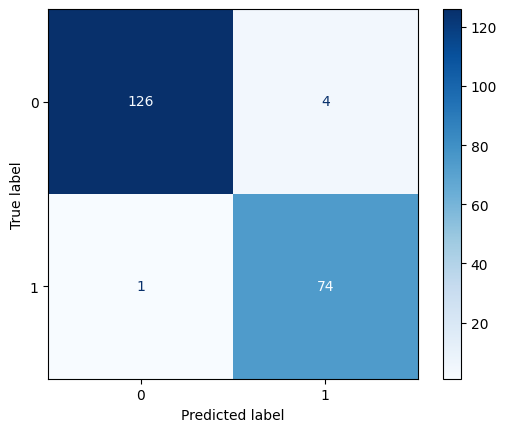

In [109]:
test_Breast_df_labels_pred = NaiBay.predict(test_Breast_df)

print(NaiBay.score(test_Breast_df, test_Breast_df_labels))

conf_tst = confusion_matrix(test_Breast_df_labels, test_Breast_df_labels_pred)
conf_tst_disp = ConfusionMatrixDisplay(confusion_matrix=conf_tst,
                                 display_labels=NaiBay.classes_)
conf_tst_disp.plot(cmap=plt.cm.Blues)
plt.show()


In [110]:
print('Confusion matrix\n\n', conf_tst)

print('\nTrue Positives(TP) = ', conf_tst[0,0])

print('\nTrue Negatives(TN) = ', conf_tst[1,1])

print('\nFalse Positives(FP) = ', conf_tst[0,1])

print('\nFalse Negatives(FN) = ', conf_tst[1,0])

Confusion matrix

 [[126   4]
 [  1  74]]

True Positives(TP) =  126

True Negatives(TN) =  74

False Positives(FP) =  4

False Negatives(FN) =  1


<AxesSubplot: >

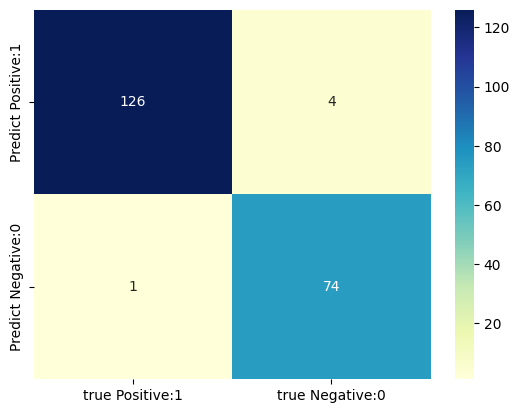

In [111]:

conf_tst = pd.DataFrame(data=conf_tst, columns=['true Positive:1', 'true Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_tst, annot=True, fmt='d', cmap='YlGnBu')

In [112]:
print(classification_report(test_Breast_df_labels, test_Breast_df_labels_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       130
           1       0.95      0.99      0.97        75

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205



In [113]:
train_Breast_df_labels.value_counts()

0    314
1    164
Name: Class, dtype: int64

In [114]:
GNaiBay = GaussianNB()
cross_val_scores_G = cross_val_score(GNaiBay, train_Breast_df, train_Breast_df_labels, cv=4)
print(cross_val_scores_G)

[0.96666667 0.96666667 0.99159664 0.95798319]


In [115]:
GNaiBay.fit(train_Breast_df, train_Breast_df_labels)

GaussianNB()

In [116]:
print(NaiBay.score(train_Breast_df, train_Breast_df_labels))

0.9748953974895398


0.9463414634146341


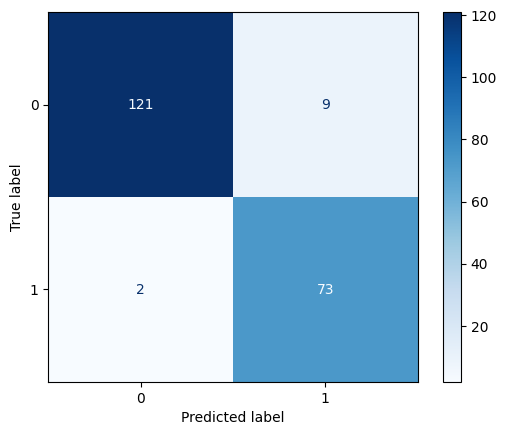

In [117]:
test_Breast_df_labels_pred_G = GNaiBay.predict(test_Breast_df)

print(GNaiBay.score(test_Breast_df, test_Breast_df_labels))

conf_tst_G = confusion_matrix(test_Breast_df_labels, test_Breast_df_labels_pred_G)
conf_tst_G_disp = ConfusionMatrixDisplay(confusion_matrix=conf_tst_G,
                                 display_labels=NaiBay.classes_)
conf_tst_G_disp.plot(cmap=plt.cm.Blues)
plt.show()


In [118]:
print('Confusion matrix\n\n', conf_tst_G)

print('\nTrue Positives(TP) = ', conf_tst_G[0,0])

print('\nTrue Negatives(TN) = ', conf_tst_G[1,1])

print('\nFalse Positives(FP) = ', conf_tst_G[0,1])

print('\nFalse Negatives(FN) = ', conf_tst_G[1,0])

Confusion matrix

 [[121   9]
 [  2  73]]

True Positives(TP) =  121

True Negatives(TN) =  73

False Positives(FP) =  9

False Negatives(FN) =  2


<AxesSubplot: >

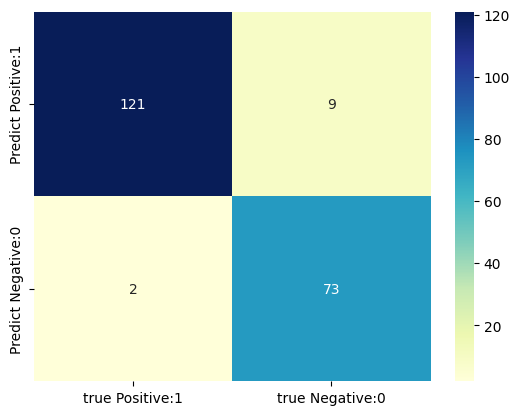

In [119]:

conf_tst_G = pd.DataFrame(data=conf_tst_G, columns=['true Positive:1', 'true Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_tst_G, annot=True, fmt='d', cmap='YlGnBu')

In [120]:
print(classification_report(test_Breast_df_labels, test_Breast_df_labels_pred_G))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       130
           1       0.89      0.97      0.93        75

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205



In [121]:
train_Breast_df_labels.value_counts()

0    314
1    164
Name: Class, dtype: int64